### NEURAL NETWORKS, Lab7 - Multi Layer Perceptron Scikit-learn project

## Excercise 1 (max 2 points)

 - Load the 'olivetti_face' dataset using 'fetch_olivetti_faces': https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces, (0.5 pts)

 - Split it into the train and test sets using the train_test_split method: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html, (0.5 pts)

 - Reshape images into (64x64) arrays and draw them using plt.imshow() method (1 pt)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

### Loading dataset

In [ ]:
# Import the iris dataset
X, y = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=42)

# Dataset shape
print("Dataset shape: ", X.shape)
print("Number of classes: ", np.unique(y).shape[0])
print("Number of samples per class: ", np.bincount(y))

Dataset shape:  (400, 4096)
Number of classes:  40
Number of samples per class:  [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


We can see we have a perfectly balanced dataset with 40 different people and 10 images per person.

### Split dataset into train and test sets

using the stratify parameter in order to create balanced distribution regarding labels percentages

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape: ", X_train.shape)
print("Number of classes: ", np.unique(y_train).shape[0])
print("Number of samples per class: ", np.bincount(y_train))

Train shape:  (320, 4096)
Number of classes:  40
Number of samples per class:  [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8]


### Reshape images into (64x64) arrays and draw them

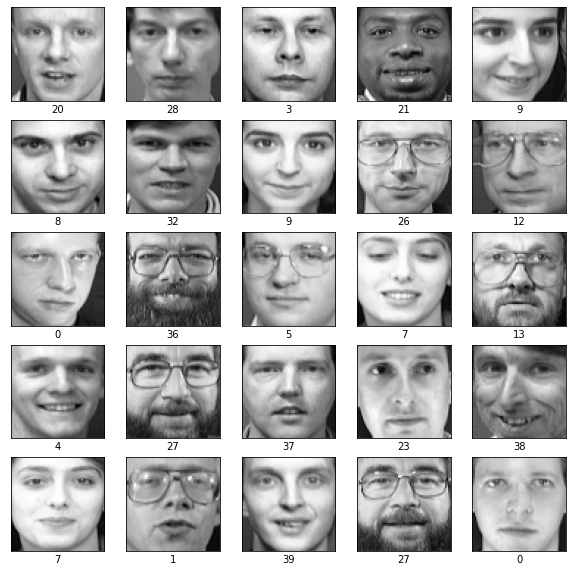

In [ ]:
# Plot the first 25 images
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(64, 64), cmap="gray")
    ax.set(xticks=[], yticks=[], xlabel=y[i])

plt.show()

## Excercise 2 (max 1 point)
Create three neural networks with various parameters using the MLPCLassifier object: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html. Try different architectures (hidden_layer_sizes), optimization algorithms (solver, momentum, nesterovs_momentum) (1 pt)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp1 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="logistic", solver="lbfgs")
mlp2 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="logistic", solver="sgd")
mlp3 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="logistic", solver="adam")
mlp4 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="tanh", solver="sgd")
mlp5 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="tanh", solver="adam")
mlp6 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="relu", solver="sgd")
mlp7 = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=1000, random_state=42, shuffle=True, activation="relu", solver="adam")

**Note**: further architectures and optimization algorithms will be explored in exercice 4 for the model with best activation function and best solver. Here I decided only to explore the activation function and solver parameters for the sake of simplicity, and then will explore different hidden_layer_sizes and optimization algorithms with GridSearchCV (*solver='sgd'* already has a default monentum value of 0.9)

## Excercise 3 (max 3 point)
 - Train your neural networks using the fit function on your training dataset. (1pt)
 
 - Report accuracy_scores anf f1-scores for all neural networks, both for training and testing datasets. (https://scikit-learn.org/stable/modules/model_evaluation.html) (1 pt)
 
 - Plot the loss curves of your neural networks (1 pt)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate(model, title, plot=True):
    print(f"***** Training model: {title} *****")

    # Train the model on the training set
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    print("\tTrain set Accuracy: ", accuracy_score(y_train, y_pred_train))
    print("\tTrain set F1 score: ", f1_score(y_train, y_pred_train, average="weighted"))

    # Predict the labels of the test set, and report metrics
    y_pred = model.predict(X_test)
    print("\tTest set Accuracy: ", accuracy_score(y_test, y_pred))
    print("\tTest set F1 score: ", f1_score(y_test, y_pred, average="weighted"))

    # Plot loss curve
    if plot:
        plt.figure(figsize=(5, 3))
        plt.plot(model.loss_curve_)
        plt.title(title + " Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

### MLP1

MLPClassifier with *solver='lbfgs'* can't be used to plot curve

In [ ]:
evaluate(mlp1, 'MLP1', plot=False)

***** Training model: MLP1 *****
	Train set Accuracy:  0.98125
	Train set F1 score:  0.9813403299916459
	Test set Accuracy:  0.6625
	Test set F1 score:  0.6358333333333334


### Rest of MLPs

***** Training model: MLP2 *****
	Train set Accuracy:  0.60625
	Train set F1 score:  0.5822334260739833
	Test set Accuracy:  0.4875
	Test set F1 score:  0.4178174603174603


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


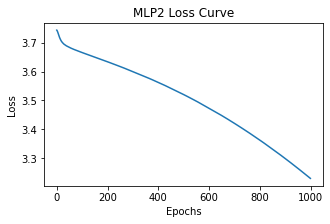

***** Training model: MLP3 *****
	Train set Accuracy:  1.0
	Train set F1 score:  1.0
	Test set Accuracy:  0.9375
	Test set F1 score:  0.9333333333333332


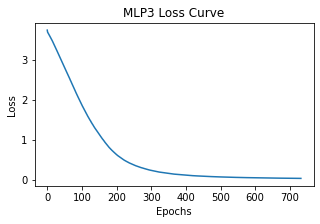

***** Training model: MLP4 *****
	Train set Accuracy:  1.0
	Train set F1 score:  1.0
	Test set Accuracy:  0.95
	Test set F1 score:  0.9466666666666665


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


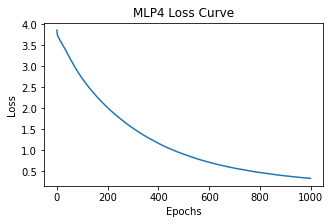

***** Training model: MLP5 *****
	Train set Accuracy:  1.0
	Train set F1 score:  1.0
	Test set Accuracy:  0.95
	Test set F1 score:  0.9466666666666667


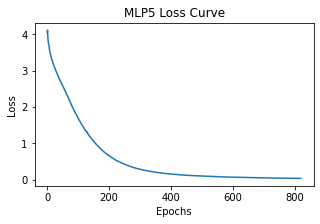

***** Training model: MLP6 *****
	Train set Accuracy:  1.0
	Train set F1 score:  1.0
	Test set Accuracy:  0.9375
	Test set F1 score:  0.9341666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


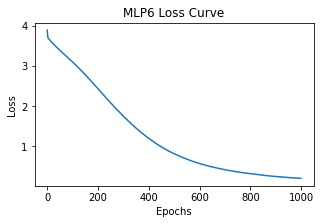

***** Training model: MLP7 *****
	Train set Accuracy:  0.4
	Train set F1 score:  0.32908801169733837
	Test set Accuracy:  0.3375
	Test set F1 score:  0.2600829725829726


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


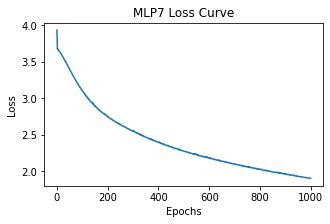

In [ ]:
mlps = {
    'mlp2': {'title': 'MLP2', 'model': mlp2},
    'mlp3': {'title': 'MLP3', 'model': mlp3},
    'mlp4': {'title': 'MLP4', 'model': mlp4},
    'mlp5': {'title': 'MLP5', 'model': mlp5},
    'mlp6': {'title': 'MLP6', 'model': mlp6},
    'mlp7': {'title': 'MLP7', 'model': mlp7}
    }

for mlp in mlps:
    evaluate(mlps[mlp]['model'], mlps[mlp]['title'])

### Conclusions

- The top models were MLP5, MLP4, MLP6 and MLP3 (by this order, based on both test accuracy and f1-score), achieving really good scores with basic parameters. For now, tanh is the best activation.

- MLP2 and MLP7 achieved poor results, and we can conclude that they are underfitted and would need more training iterations, which can really be seen in the Loss Curve of MLP2.

- MLP1, that uses *solver='lbfgs'*, achieves scores below 0.9, and no Loss Curve can be plotted, so I will no longer insist on optimizing a model with that solver.

- MLP optimizes the log-loss function using LBFGS or stochastic gradient descent. On several model the max iterations were reached, which means I can tune this models further (*max_iter* and *momentum* parameters) to get better results. Looking at the Loss Curves, basically almost all of them being flat by 1000 epochs, so when using GridSearch in exercise 4, 1500 or 2000 max_iter should be enough (and the model automatically stops training if after 10 epochs, there is no significant improvement - *tol* and *n_iter_no_change* parameters).


## Excercise 4 (max 4 points)

 - Try to optimize the hyperparameters of your best neural network from previous exercises, using GridSearchCV or RandomizedSearchCV (https://scikit-learn.org/stable/modules/grid_search.html) (2 pts)
 
 - Report the accuracy_score, f1score, and confusion matrix of your best neural network (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) (1pt)
 
 - Evaluate your neural network using cross validation (cross_val_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) (1pt)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

def optimize(model, param_grid, title):
    print(f"***** Optimizing model: {title} *****")

    # Create a GridSearchCV object
    # I will use scoring="accuracy" instead of "f1_weighted" because the dataset is balanced
    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=4)

    # Fit the model
    grid.fit(X_train, y_train)

    # Print the best parameters and the corresponding score
    print("\tBest model: ", grid.best_estimator_)
    print("\tBest GridSearch cross-validation score: ", grid.best_score_)

    # Predict the labels of the test set, and report metrics
    y_pred = grid.predict(X_test)
    print("\n\tTest set Accuracy: ", accuracy_score(y_test, y_pred))
    print("\tTest set F1 score: ", f1_score(y_test, y_pred, average="weighted"))

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    plt.imshow(confusion_matrix(y_test, y_pred), cmap="Blues")
    plt.title(title + " Confusion Matrix")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

    # Cross validation on best model
    # GridSearchCV already performs cross validation, but I will do it again to see the results as asked
    cv_score = cross_val_score(grid.best_estimator_, X, y, cv=5, scoring="accuracy", n_jobs=-1)
    print("\tCross validation score: ", cv_score)

- In this exercise I will not change the *activation* and *solver* parameters, as I already know the best ones from exercise 2. I will only change some other arguments regarding the top 3 models with different activation (MLP5 - tanh, MLP6 - relu, and MLP3 - logistic).

- Since no model was overfitting, there is no much point in trying to tune the regularization - L2 with the *alpha* paramter. (and I have tried in alone tests besides GridSearchCV and it did not make a difference).

- Regarding the problem complexity and dataset size, 1 to 2 hidden layers should be enough, and the satisfying scores from exercise 2 prove that.

- Will try a lower *learning_rate_init*, and provide an *learning_rate=adaptive* (this is only when *solver=sgd*, so only in MLP6), so the network can learn better and is able to reduce the learning rate if needed. Setting learning_rate values can be hard, since:
  - a high learning rate results in weight updates that will be too large and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs.
  - a low learning rate will cause training to be slower, and may never converge or leads to a suboptimal solution.

- As concluded in exercise 2, with those parameters provided it is necessary to increase *max_iter*, so that at least MLP6 can converge. Also, with a lower learning_rate more iterations will be needed.

- The *momentum* parameter can only be used when *solver='sgd'* so I will only tune it in MLP6.

### MLP5

***** Optimizing model: MLP5 *****
Fitting 5 folds for each of 9 candidates, totalling 45 fits
	Best model:  MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50),
              learning_rate_init=0.0001, max_iter=2000, random_state=42)
	Best GridSearch cross-validation score:  0.95

	Test set Accuracy:  0.9625
	Test set F1 score:  0.96


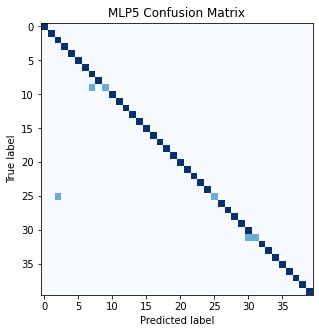

	Cross validation score:  [0.975  0.9375 0.9375 0.9875 0.975 ]


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], # default = (100,)
    'max_iter': [2000], # default = 200
    'learning_rate_init': [0.0001, 0.001, 0.01] # default = 0.001
}

optimize(mlp5, param_grid, 'MLP5')

### MLP6

***** Optimizing model: MLP6 *****
Fitting 5 folds for each of 27 candidates, totalling 135 fits
	Best model:  MLPClassifier(learning_rate='adaptive', learning_rate_init=0.01, max_iter=2000,
              momentum=0.8, random_state=42, solver='sgd')
	Best GridSearch cross-validation score:  0.940625

	Test set Accuracy:  0.9625
	Test set F1 score:  0.96


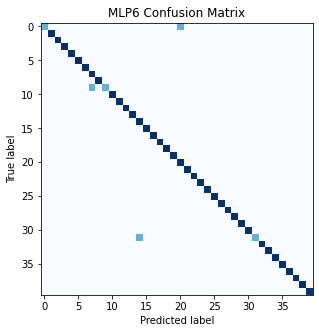

	Cross validation score:  [0.9875 0.9125 0.9375 0.975  0.9625]


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], # default = (100,)
    'max_iter': [2000], # default = 200
    'learning_rate': ['adaptive'], # default = 'constant'
    'learning_rate_init': [0.0001, 0.001, 0.01], # default = 0.001
    'momentum': [0.8, 0.9, 0.99] # default = 0.9
}

optimize(mlp6, param_grid, 'MLP6')

### MLP3

***** Optimizing model: MLP3 *****
Fitting 5 folds for each of 9 candidates, totalling 45 fits
	Best model:  MLPClassifier(activation='logistic', max_iter=2000, random_state=42)
	Best GridSearch cross-validation score:  0.946875

	Test set Accuracy:  0.975
	Test set F1 score:  0.9733333333333333


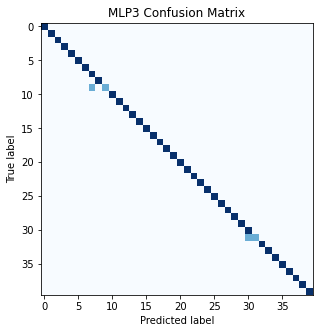

	Cross validation score:  [0.9875 0.925  0.975  0.9875 0.9875]


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)], # default = (100,)
    'max_iter': [2000], # default = 200
    'learning_rate_init': [0.0001, 0.001, 0.01], # default = 0.001
}

optimize(mlp3, param_grid, 'MLP3')

### Conclusions

I performed a GridSearchCV with 5-fold cross validation for each of the 3 models, and then CrossValidation with 5-fold cross validation for the best model of each. I could have tried more parameters, but I explained which parameters would be worth tuning or not, and that would mean more combinations which would take even longer to train on GridSearchCV, and MLP6 already took too much time (17 mins).

I was able to sucessfully tune each model and get better results than the ones I got in exercise 2, with very good scores for all of them, but MLP3 being the clear winner with scores above 97%.